In [179]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import my_ensembler, feature_utils, defines, model_utils, my_bert
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
import common_utils
from transformers import BertModel, BertTokenizerFast
from sklearn_crfsuite.utils import flatten


### Load docs map

In [73]:
per_par=True
seq_len=3
step=3

In [74]:
dir_name = "scaled_maxabs"
doc_map_path =  os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"nan_max.abs_sacled_docs_map.json")
with open(doc_map_path, 'r') as fp:


In [205]:
common_utils.get_class_weights(flatten(y_test_crf))

array([1.93034056, 0.67478355])

## Try BERT Transformer

In [211]:
# alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
imp.reload(my_bert)
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
X_tensor_map = bert_preprocess.fit_transform(X=docs_map,indices=np.arange(1,71))


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [212]:
len(X_tensor_map['y']),sum(X_tensor_map['y'])

(31956, tensor(8974))

## Try BERT estmimator

In [92]:
imp.reload(my_bert)
alephbert_model = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_estimator

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



>>>>>>>init() called.



BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [93]:
X_tensor_map.keys()

dict_keys(['seq', 'mask', 'y', 'y_list'])

In [101]:
np.unique(X_tensor_map['y'])

array([0, 1])

In [111]:
imp.reload(my_bert)
my_bert.get_cross_entropy(np.asarray(X_tensor_map['y']))

Class Weights: [0.69523975 1.78047693]


NLLLoss()

In [110]:
np.asarray(X_tensor_map['y'])

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
%%time
imp.reload(my_bert)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_estimator.fit(X=X_tensor_map)


>>>>>>>init() called.

>>>>>>> fit() called
Class Weights: [0.69523975 1.78047693]
CPU times: user 3h 16min 46s, sys: 1h 15min 5s, total: 4h 31min 52s
Wall time: 15min 31s


BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [129]:
bert_estimator

BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [125]:
X_tensor_map_train = bert_preprocess.fit_transform(X=docs_map,indices=np.arange(72,81))


>>>>>>>fit() called.


>>>>>>>transform() called.



In [138]:
X_tensor_map_train['y']

tensor([0, 0, 0,  ..., 0, 0, 0])

In [134]:
y_test = ['is_nar' if i==1 else 'not_nar' for i in list(X_tensor_map_train['y'])]


              precision    recall  f1-score   support

     not_nar       0.80      0.95      0.87      2772
      is_nar       0.69      0.30      0.42       969

    accuracy                           0.78      3741
   macro avg       0.74      0.63      0.64      3741
weighted avg       0.77      0.78      0.75      3741



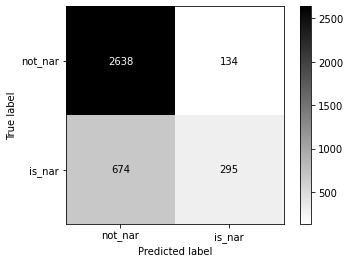

In [139]:
feature_utils.get_prediction_report(y_test,bert_pred,labels=['not_nar','is_nar'])

In [184]:
bert_proba = bert_estimator.predict_proba(X_tensor_map_train)
bert_proba

array([[0.7778702 , 0.22212978],
       [0.7609829 , 0.23901714],
       [0.7513149 , 0.24868506],
       ...,
       [0.76287687, 0.23712313],
       [0.7348781 , 0.26512188],
       [0.2802126 , 0.71978736]], dtype=float32)

## Try pipeline: transform -> fit

In [270]:
train_indices=np.arange(1,11)
test_indices=np.arange(12,16)

In [271]:
train_indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [463]:
X_train = common_utils.select_dic_keys(docs_map,train_indices)
X_test = common_utils.select_dic_keys(docs_map,test_indices)
y_train=common_utils.get_y_labels(docs_map,train_indices)
y_test=common_utils.get_y_labels(docs_map,test_indices)

In [473]:
imp.reload(model_utils)
imp.reload(common_utils)


crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)

crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

crf_estimator=model_utils.CrfClassifier(crf_model=crf)
crf_pipe = Pipeline(steps=[('preprocessor',crf_preprocess), ('classifier', crf_estimator)]) 


>>>>>>>init() called.


>>>>>>>init() called.



In [474]:
type(X_train)

dict

In [475]:
X_train[1].keys()

dict_keys(['X', 'y', 'groups', 'X_bert', 'y_bert', 'X_3_3', 'y_3_3', 'groups_3_3'])

In [476]:
crf_pipe

Pipeline(steps=[('preprocessor', CrfTransformer()),
                ('classifier',
                 CrfClassifier(crf_model=CRF(algorithm='lbfgs',
                                             all_possible_transitions=True,
                                             c1=0.5052489623208797,
                                             c2=0.03723629092212718,
                                             linesearch='MoreThuente',
                                             max_iterations=100,
                                             min_freq=9)))])

In [477]:
crf_pipe.fit_transform(X=X_train,y=y_train)


>>>>>>>transform() called.



CrfClassifier(crf_model=CRF(algorithm='lbfgs', all_possible_transitions=True,
                            c1=0.5052489623208797, c2=0.03723629092212718,
                            linesearch='MoreThuente', max_iterations=100,
                            min_freq=9))

In [480]:
crf_proba=crf_pipe.predict_proba(X=X_test)


>>>>>>>transform() called.



In [481]:
crf_proba

array([[0.91155729, 0.08844271],
       [0.94704095, 0.05295905],
       [0.95368004, 0.04631996],
       ...,
       [0.99726994, 0.00273006],
       [0.99043378, 0.00956622],
       [0.86430078, 0.13569922]])

In [502]:
imp.reload(my_bert)
imp.reload(common_utils)
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_pipe = Pipeline(steps=[('preprocessor',bert_preprocess), ('classifier', bert_estimator)]) 


>>>>>>>init() called.


>>>>>>>init() called.



In [503]:
bert_pipe.fit_transform(X=X_train,y=y_train)


>>>>>>>fit() called.


>>>>>>>transform() called.

>>>>>>> fit() called
Class Weights: [0.70645766 1.71090201]


BertClassifier(pretrained_model=BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): B...
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
))

In [504]:
bert_proba=bert_pipe.predict_proba(X=X_test)


>>>>>>>transform() called.



In [505]:
bert_proba

array([[0.58403546, 0.41596457],
       [0.48069516, 0.5193048 ],
       [0.6089756 , 0.3910244 ],
       ...,
       [0.61370355, 0.38629642],
       [0.5848076 , 0.41519243],
       [0.56672853, 0.43327147]], dtype=float32)

In [453]:
imp.reload(model_utils)
my_split=model_utils.DocsMapFold()
my_split

In [455]:
for tr,ts in my_split.split(docs_map):
    print(len(tr),len(ts))
    print(list(tr)[:5],list(ts)[:5])

64 16
[1, 3, 4, 5, 6] [32, 2, 34, 68, 36]
64 16
[1, 2, 4, 5, 6] [32, 33, 3, 36, 69]
64 16
[1, 2, 3, 5, 7] [64, 33, 32, 35, 4]


In [456]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

In [ ]:
crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)
crf_estimator=model_utils.CrfClassifier(crf_model=crf.clone())
x_train_crf,y_train_crf=crf_preprocess.fit_transform(docs_map,{'indices':train_idx})
x_test_crf,y_test_crf=crf_preprocess.fit_transform(docs_map,{'indices':test_idx})
crf_estimator=

bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
x_train_bert,y_train_bert=bert_preprocess.fit_transform(docs_map,{'indices':train_idx})
x_test_bert,y_test_bert=bert_preprocess.fit_transform(docs_map,{'indices':test_idx}
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_estimator                                            

In [508]:
isinstance(y_train,np.ndarray)

False

In [537]:
len(X_train.keys()), len(X_test.keys())

(10, 4)

In [592]:
from sklearn.ensemble import VotingClassifier,StackingClassifier
%%time
imp.reload(model_utils)
imp.reload(common_utils)

# crf pipe
crf_preprocess = model_utils.CrfTransformer(seq_len=3,step=3)

crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

crf_estimator=model_utils.CrfClassifier(crf_model=crf)
crf_pipe = Pipeline(steps=[('preprocessor',crf_preprocess), ('classifier', crf_estimator)])
# bert pipe
bert_preprocess = my_bert.BertTransformer(tokenizer=alephbert_tokenizer)
bert_estimator = my_bert.BertClassifier(pretrained_model=alephbert_model)
bert_pipe = Pipeline(steps=[('preprocessor',bert_preprocess), ('classifier', bert_estimator)]) 

#voting
vote = model_utils.MyVotingClassifier(
estimators=[('crf_pipe',crf_pipe),('bert_pipe', bert_pipe)],
   voting='soft')
vote.fit(X_train, y_train)


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>transform() called.


>>>>>>>init() called.


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


>>>>>>> fit() called
Class Weights: [0.70645766 1.71090201]


MyVotingClassifier(estimators=[('crf_pipe',
                                Pipeline(steps=[('preprocessor',
                                                 CrfTransformer()),
                                                ('classifier',
                                                 CrfClassifier(crf_model=CRF(algorithm='lbfgs',
                                                                             all_possible_transitions=True,
                                                                             c1=0.5052489623208797,
                                                                             c2=0.03723629092212718,
                                                                             linesearch='MoreThuente',
                                                                             max_iterations=100,
                                                                             min_freq=9)))])),
                               ('bert_pipe',
                                Pipeline(steps=[('preprocessor',
                                                 BertTransformer(...
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
)))]))],
                   voting='soft')

In [594]:
vote.predict_proba(X_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


array([[0.76063667, 0.23936328],
       [0.7032875 , 0.29671247],
       [0.77802077, 0.22197923],
       ...,
       [0.79033748, 0.20966253],
       [0.78208809, 0.2179119 ],
       [0.73401475, 0.26598522]])

In [595]:
imp.reload(model_utils)
voting_pred=stack.predict(X_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



In [596]:
voting_pred

array(['is_nar', 'is_nar', 'is_nar', ..., 'is_nar', 'is_nar', 'is_nar'],
      dtype='<U7')


              precision    recall  f1-score   support

      is_nar       0.16      0.50      0.24       648
     not_nar       0.46      0.14      0.21      1994

    accuracy                           0.23      2642
   macro avg       0.31      0.32      0.23      2642
weighted avg       0.39      0.23      0.22      2642



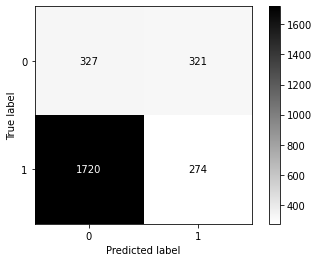

In [597]:
feature_utils.get_prediction_report(flatten(y_test),voting_pred,labels=vote.classes_)

In [590]:
len(y_test),len(flatten(y_test))

(164, 2642)

In [598]:
imp.reload(model_utils)
imp.reload(my_bert)
vote=vote.score(X_test,y_test)


>>>>>>>transform() called.


>>>>>>>transform() called.



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [599]:
vote

0.2148920917440065

In [581]:
len(X_test),len(y_test)

(4, 164)

In [570]:
stack.estimators_[1].score(X_test,y_test)


>>>>>>>transform() called.



ValueError: Found input variables with inconsistent numbers of samples: [164, 2642]

In [567]:
def my_fit_and_score(
    estimator_pipe,
    docs_map,
    scorer,
    train_idx,
    test_idx):
    
    result = {}
    X_train,y_train = estimator_pipe.named_steps['preprocessor'].fit_transform(docs_map,train_idx)
    X_test,y_test = estimator_pipe.named_steps['preprocessor'].fit_transform(docs_map,test_idx)
    test_scores = estimator_pipee.named_steps['classifier'].fit(X_train)
    test_scores = estimator_pipee.named_steps['classifier'].score(X_test,y_test)
    result["test_scores"] = test_scores
    return results

In [568]:
class ByDocFold:
    def __init__(self, n_splits=3):
        self.n_splits = n_splits

    def split(self, X, y, groups=None):
        doc_indices = set(groups)
        doc_count = len(doc_indices)
        test_count = int(defines.TEST_PERSENT * doc_count)
        for i in range(self.n_splits):
            test_docs = set(random.sample(doc_indices, test_count))
            train_docs = doc_indices - test_docs
            train_idx = [i for i, j in enumerate(groups) if j in train_docs]
            test_idx = [i for i, j in enumerate(groups) if j in test_docs]
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [70]:
best_params_crf

{'algorithm': 'lbfgs',
 'c1': 0.5052489623208797,
 'c2': 0.03723629092212718,
 'linesearch': 'MoreThuente',
 'min_freq': 9}

In [72]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

In [83]:
imp.reload(model_utils)
crf_preprocess = model_utils.CrfTransformer(seq_len,step)


>>>>>>>init() called.



In [84]:
crf_pipe= Pipeline(steps=[('preprocessor', crf_preprocess), ('classifier', crf)])

In [88]:
crf_preprocess.fit_transform(X=docs_map,indices=np.arange(1,70))


>>>>>>>fit() called.


>>>>>>>transform() called.



TypeError: 'NoneType' object is not iterable

In [ ]:
y = df1.index
x = preprocessing.scale(df1)

phy_features = ['A', 'B', 'C']
phy_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
phy_processer = ColumnTransformer(transformers=[('phy', phy_transformer, phy_features)])

fa_features = ['D', 'E', 'F']
fa_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
fa_processer = ColumnTransformer(transformers=[('fa', fa_transformer, fa_features)])


pipe_phy = Pipeline(steps=[('preprocessor', phy_processer ),('classifier', SVM)])
pipe_fa = Pipeline(steps=[('preprocessor', fa_processer ),('classifier', SVM)])

ens = VotingClassifier(estimators=[pipe_phy, pipe_fa])

cv = KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in cv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ens.fit(x_train,y_train)
    print(ens.score(x_test, y_test))

In [65]:
docs_map[1].keys()

dict_keys(['X', 'y', 'groups', 'X_3_3', 'y_3_3', 'groups_3_3', 'text'])

In [ ]:
cv = ByDocFold()
for train_index, test_index in cv.split(x):
    x_train_crf, y_train_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,train_idx,seq_len,step)
    x_test_crf, y_test_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,test_index,seq_len,step)

    x_train_crf, y_train_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,train_idx,seq_len,step)
    x_test_crf, y_test_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,test_index,seq_len,step)
    
    y_train, y_test = y[train_index], y[test_index]
    ens.fit(x_train,y_train)
    print(ens.score(x_test, y_test))

In [35]:
tr,ts=model_utils.get_test_train_idx(docs_map,0.2,seed=42)

In [41]:
imp.reload(model_utils)
y_test = model_utils.get_y_by_doc_indices(docs_map,tr,seq_len,step)

In [42]:
y_test

[['not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar'],
 ['not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'not_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 [

In [43]:
imp.reload(model_utils)
seq_len=3
step=3
crf_transformer = model_utils.CrfTransformer(seq_len,step,dir_name)
crf_clf=CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True)
crf_pipe = Pipeline(steps=[('transformer', crf_transformer ),('classifier', crf_clf)])
crf_pipe.fit(tr,y_test)


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.



Pipeline(steps=[('transformer',
                 CrfTransformer(dir_name='recalc_tfidf', seq_len=3, step=3)),
                ('classifier',
                 CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1,
                     c2=0.1, max_iterations=100))])

In [24]:
docs_map

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    [
    ('crf', 
      crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )),
#      ('alephbert',
#       #loadmodel
#      ),
#         ('hebert',
#         #loadmodel
#         )
    ('knn', KNeighborsClassifier())
    ],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), voting.score(X_test, y_test)

### Prepare data for KNN

In [38]:
def concat_vectors(dim = 300):
    X_vec = pd.DataFrame()
    y_vec = pd.Series(dtype=int)
    doc_list = glob.glob(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"*_sent_vec{}_db.csv".format(dim)))
    doc_list.sort()
    for i,doc in enumerate(doc_list):
        doc_idx = feature_utils.get_doc_idx_from_name(doc)
        sent_vec_db = pd.read_csv(doc)
        sent_db =  pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(doc_idx)),usecols=['is_nar'])
        y_vec = pd.concat([y_vec,sent_db['is_nar']],ignore_index=True)
        X_vec = pd.concat([X_vec,sent_vec_db],ignore_index=True)
    return X_vec,y_vec

In [39]:
X_vec,y_vec =concat_vectors()

In [40]:
X_vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029905,0.038024,0.000409,-0.002114,-0.001024,-0.023301,0.052745,0.006430,-0.046377,0.020095,...,0.014652,0.000285,-0.035123,-0.030111,-0.027191,0.026381,0.005289,0.005408,-0.020530,0.001053
1,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2,-0.085588,0.067969,0.007988,0.032841,-0.052474,-0.082648,0.003187,0.004346,-0.054798,0.033916,...,0.015144,0.047520,0.017374,0.017066,-0.094182,-0.041293,-0.041231,-0.052368,0.037051,-0.036378
3,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.028992,0.024537,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388
4,0.036749,0.012629,-0.027156,-0.004715,-0.005032,0.006106,-0.031141,-0.070769,-0.020561,0.019293,...,0.034837,-0.046828,0.011486,-0.009508,-0.058013,0.021407,-0.048019,-0.067683,-0.061374,-0.075125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33231,0.000403,0.030761,0.006861,0.004358,0.004020,-0.034013,-0.000644,0.006724,-0.025179,0.023791,...,-0.004880,0.018460,-0.012988,-0.015199,0.007455,0.018707,0.010102,0.018673,-0.018850,-0.015083
33232,0.005242,0.025412,0.033902,0.024731,-0.006604,0.030173,-0.049072,0.008212,-0.030461,-0.011216,...,0.003355,-0.001061,-0.019386,0.016321,-0.066378,0.016374,0.000689,0.015705,0.017209,0.015820
33233,-0.000916,0.064209,-0.006212,-0.010558,-0.056428,-0.062275,-0.031020,0.041746,-0.062375,0.090405,...,-0.031854,-0.019589,-0.008862,0.013844,-0.076933,-0.032281,-0.060818,-0.041205,-0.029383,-0.056909
33234,0.048067,0.013103,-0.032234,-0.009326,-0.017668,-0.028665,0.105883,-0.009100,-0.036032,-0.006796,...,-0.016274,-0.000202,0.001330,0.031665,-0.035877,0.018119,0.033564,-0.041964,-0.011305,0.029903


In [41]:
y_vec

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33231    0.0
33232    0.0
33233    0.0
33234    0.0
33235    0.0
Length: 33236, dtype: float64

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.33, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      7570
         1.0       0.52      0.33      0.40      3398

    accuracy                           0.70     10968
   macro avg       0.63      0.60      0.60     10968
weighted avg       0.67      0.70      0.67     10968



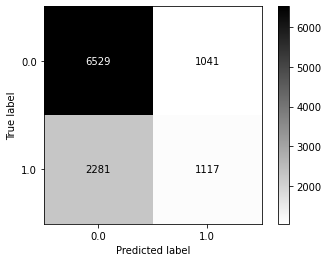

In [47]:
feature_utils.get_prediction_report(y_test,y_pred,knn.classes_)

In [ ]:
estimators={}
estimators['crf'] = {}
estimators['crf']['mod'] = 

In [ ]:
crf=estimators['crf']['mod']
alephbert=estimators['alephbert']['mod']
hebert=estimators['hebert']['mod']

In [ ]:
classifiers = [crf,alephbert,hebert]
scv=my_ensembler.ensemble()

# scv.fit(X_train,y_train)
# scv_predicted = scv.predict(X_test)
# scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
# scv_acc_score = accuracy_score(y_test, scv_predicted)
# print("confussion matrix")
# print(scv_conf_matrix)
# print("\n")
# print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
# print(classification_report(y_test,scv_predicted))

# Manual ensemble crf + BERT

In [48]:
import imp, model_utils, feature_utils, my_bert, common_utils
from transformers import BertModel, BertTokenizerFast
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite.utils import flatten
import pandas as pd

In [8]:
doc_map_path =  os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"docs_map.json")
with open(doc_map_path, 'r') as fp:
    docs_map = json.load(fp)

In [244]:
test_docs

[4, 69, 70, 72, 12, 13, 14, 78, 18, 27, 28, 29]

In [58]:
docs_map = {int(k):v for k,v in docs_map.items()}

### Load test docs that BERT has not seen yet

In [314]:
all_docs = [int(i) for i in docs_map.keys()]
all_docs = set(all_docs)
train_docs = all_docs - set(test_docs)
len(train_docs)

68

In [71]:
import json, os, sys, numpy as np
sys.path.append('./src/')
import defines
dir_name="recalc_tfidf"
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"test_doc_indices.json")
with open(json_path, 'r') as fp:
    test_docs = json.load(fp)

#### Prepare tested docs for input to CRF

In [257]:
imp.reload(model_utils)
seq_len=3
step=3
per_par=True
feature_utils.reshape_docs_map_to_seq(docs_map,per_par,seq_len,step)
X_test,y_test,groups_test = model_utils.get_X_y_by_doc_indices(docs_map,test_docs,seq_len,step)
train_docs = set(docs_map.keys()) - set(test_docs)
X_train,y_train,groups_train = model_utils.get_X_y_by_doc_indices(docs_map,train_docs,seq_len,step)

[68] 439 -> 147 [57] 271 -> 91 [42] 136 -> 46 [63] 338 -> 113 [76] 132 -> 44 [49] 206 -> 69 [21] 108 -> 36 [34] 49 -> 17 [15] 121 -> 41 [39] 111 -> 37 [13] 90 -> 30 [6] 420 -> 140 [27] 67 -> 23 [32] 73 -> 25 [18] 62 -> 21 [65] 335 -> 112 [70] 183 -> 61 [51] 208 -> 70 [44] 199 -> 67 [48] 223 -> 75 [62] 248 -> 83 [77] 176 -> 59 [56] 268 -> 90 [43] 99 -> 33 [69] 517 -> 173 [14] 129 -> 43 [1] 203 -> 68 [20] 90 -> 30 [35] 63 -> 21 [19] 265 -> 89 [26] 114 -> 38 [33] 91 -> 31 [12] 150 -> 50 [7] 248 -> 83 [38] 90 -> 30 [50] 184 -> 62 [45] 204 -> 68 [64] 347 -> 116 [71] 156 -> 52 [2] 156 -> 52 [17] 322 -> 108 [28] 167 -> 56 [80] 223 -> 75 [9] 276 -> 92 [36] 87 -> 29 [23] 74 -> 25 [74] 95 -> 32 [61] 433 -> 145 [40] 148 -> 50 [55] 249 -> 83 [46] 200 -> 67 [53] 149 -> 50 [79] 172 -> 58 [58] 384 -> 128 [72] 420 -> 140 [67] 407 -> 136 [30] 82 -> 28 [25] 122 -> 41 [4] 132 -> 44 [11] 121 -> 41 [37] 99 -> 33 [22] 89 -> 30 [8] 82 -> 28 [29] 105 -> 35 [3] 113 -> 38 [16] 102 -> 34 [41] 137 -> 46 [54] 243 

In [59]:
imp.reload(common_utils)
common_utils.get_random_sample(docs_map)

[{'is_question': 0.0,
  'par_idx_in_doc': 27.0,
  'sent_len': 33.0,
  'is_client': 1,
  'sent_idx_in_par': 0,
  'sent_pos_in_par': 0.3333333333333333,
  'sent_pos_in_doc': 0.1267605633802817,
  'TOKEN': 8,
  'POSTAG_BN': 0.125,
  'POSTAG_CC': 0.25,
  'POSTAG_PRP': 0.125,
  'POSTAG_RB': 0.5,
  'f_gen_M': 0.25,
  'f_num_S': 0.25,
  'f_per_1': 0.125,
  'f_per_A': 0.125,
  'sent_idx': 53,
  '-1:is_question': 0.0,
  '-1:par_idx_in_doc': 26.0,
  '-1:sent_len': 2.0,
  '-1:is_client': 0,
  '-1:sent_idx_in_par': 1,
  '-1:sent_pos_in_par': 1.0,
  '-1:sent_pos_in_doc': 0.1244131455399061,
  '-1:TOKEN': 1,
  '-1:POSTAG_NNP': 1.0,
  '-1:f_gen_M': 1.0,
  '-1:f_num_S': 1.0,
  '+1:is_question': 0.0,
  '+1:par_idx_in_doc': 27.0,
  '+1:sent_len': 56.0,
  '+1:is_client': 1,
  '+1:sent_idx_in_par': 1,
  '+1:sent_pos_in_par': 0.6666666666666666,
  '+1:sent_pos_in_doc': 0.1291079812206572,
  '+1:TOKEN': 12,
  '+1:POSTAG_BN': 0.0833333333333333,
  '+1:POSTAG_CC': 0.1666666666666666,
  '+1:POSTAG_COP': 0.1666

In [63]:
docs_map[1]['text']

['אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי',
 'כן',
 'אוקיי מה שלומך?',
 'ברוך השם',
 'מחר יש לכם יום טיול',
 'כן',
 'מה אתם עושים?',
 'אה נוסעים ליערות הכרמל',
 'שזה יום כזה',
 'אה',
 'כן היום זה עובד ככה שפונים לחברות שעושות את כל הדברים האלה כבר',
 'מארגנות הכל אז יש שם פעילויות יש יום',
 'כן זה מן מלון ספא כזה נכון?',
 'משהו כזה',
 'לא ליערות הכרמל כן יש שם גם את זה אבל אנחנו נוסעים אה רגע יכול להיות שלא קוראים לזה יערות הכרמל?',
 'כן איפה שהיה השריפה',
 'כן',
 'אבל שמה יש איזה יום שאנחנו נעשה פעילויות וזה',
 'לא במלון',
 'אה גם למלון אני חושב קוראים יערות הכרמל חשבתי לזה התכוונת',
 'כן וזה בא בדיוק בתקופה',
 'אנחנו עכשיו בחברה בגלל שיש את כל הצמצומים אז חלק מהחברה החברה הרי עברו עם משרדים וחלק השכירו לחברה אחרת והתכנון היה שבעתיד אנחנו נגדל ככה שנגיד לחברה הזאת ביי ביי ונכנס לשטח הזה',
 'מה שקרה זה שהגלגל התהפך והחברה במצב לא משהו אז והם גדלו החברה השנייה אז איפה שאני ישבתי המחלקה שלי אנחנו בעצם סוגרים אותה ונותנים את השטח הזה משכירים את השטח הזה לחברה השנייה בעצם כדי לחסוך

#### Prepare tested docs for imput to BERT

In [258]:
sent_db = common_utils.concat_dbs(dir_name,"sent_db",['text','is_nar'])

In [259]:
imp.reload(my_bert)
alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
test_text, test_labels = my_bert.get_text_label_by_doc(sent_db,test_docs)
test_tokens = my_bert.get_test_tokens(alephbert_tokenizer,test_text)
tensor_map = my_bert.covert_test_token2tensor(test_tokens,test_labels)

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


#### Load pre-trained BERT model

In [260]:
model_name = "alephbert"
alephbert = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
wrapped_model = my_bert.wrap_pretained_model(alephbert)
saved_model = my_bert.load_saved_bert_model(wrapped_model,model_name)

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Instance CRF with selected parameters

In [69]:
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"best_params_lemma.word_docFoldCv_2.json")

with open(json_path, 'r') as fp:
    best_params_crf = json.load(fp)
best_params_crf

{'algorithm': 'lbfgs',
 'c1': 0.5052489623208797,
 'c2': 0.03723629092212718,
 'linesearch': 'MoreThuente',
 'min_freq': 9}

In [262]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)
crf.fit(X_train,y_train)
crf

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.5052489623208797,
    c2=0.03723629092212718, linesearch='MoreThuente', max_iterations=100,
    min_freq=9)

In [263]:
def get_pred_label_from_prob(df):
    return "not_nar" if df['avg_prob_0']>df['avg_prob_1'] else "is_nar"

In [299]:
imp.reload(my_bert)
imp.reload(model_utils)

def ensemble_predictions(crf_model,x_test_crf,bert_model,x_test_bert,weights):
    pred_df = pd.DataFrame()
    bert_label, bert_proba = my_bert.get_prediction(bert_model,x_test_bert)
    crf_label = flatten(crf_model.predict(x_test_crf))
    crf_proba = model_utils.get_predicted_prob_from_dict(flatten(crf_model.predict_marginals(x_test_crf)))
    pred_df['bert'] = ['not_nar' if i ==0 else 'is_nar' for i in bert_label]
    pred_df['crf'] = crf_label
    pred_df['bert_proba_0']=bert_proba[:,0]
    pred_df['bert_proba_1']=bert_proba[:,1]
    pred_df['crf_proba_0']=crf_proba[:,0]
    pred_df['crf_proba_1']=crf_proba[:,1]
    probas = np.asarray([crf_proba,bert_proba])
    avg = np.average(
                probas, axis=0, weights=weigths
            )
    pred_df['avg_prob_0'] = avg[:,0]
    pred_df['avg_prob_1'] = avg[:,1]
    pred_df['voted_label'] = pred_df[['avg_prob_0','avg_prob_1']].idxmax(axis=1)
    pred_df['voted_label'].replace('avg_prob_0','not_nar',inplace=True)
    pred_df['voted_label'].replace('avg_prob_1','is_nar',inplace=True)
    return pred_df


In [265]:
def get_predicted_prob_from_dict(y_pred_proba_flat):
    pr_arr = np.zeros((len(y_pred_proba_flat),2))
    pr_arr[:,0] = [sample['not_nar'] for sample in y_pred_proba_flat]
    pr_arr[:,1] = [sample['is_nar'] for sample in y_pred_proba_flat]
    return pr_arr

In [267]:
weights=[0.7,0.3]
pred_df = ensemble_predictions(crf,X_test,saved_model,tensor_map['test'],weights)
pred_df

,bert,crf,bert_proba_0,bert_proba_1,crf_proba_0,crf_proba_1,avg_prob_0,avg_prob_1,voted_label
0,0,not_nar,0.718448,0.281552,0.981550,0.018450,0.902619,0.097381,not_nar
1,0,not_nar,0.807705,0.192295,0.990942,0.009058,0.935971,0.064029,not_nar
2,0,not_nar,0.846506,0.153494,0.997356,0.002644,0.952101,0.047899,not_nar
3,1,is_nar,0.410462,0.589538,0.383633,0.616367,0.391682,0.608318,is_nar
4,1,is_nar,0.243487,0.756513,0.336836,0.663164,0.308831,0.691169,is_nar
...,...,...,...,...,...,...,...,...,...
6098,1,not_nar,0.421347,0.578653,0.968799,0.031201,0.804563,0.195436,not_nar
6099,0,not_nar,0.586311,0.413688,0.965671,0.034329,0.851863,0.148137,not_nar
6100,0,not_nar,0.747379,0.252621,0.952480,0.047520,0.890950,0.109050,not_nar
6101,0,not_nar,0.830255,0.169745,0.906428,0.093572,0.883576,0.116424,not_nar


BERT alone
              precision    recall  f1-score   support

     not_nar       0.69      0.57      0.63      4029
      is_nar       0.38      0.50      0.43      2074

    accuracy                           0.55      6103
   macro avg       0.53      0.54      0.53      6103
weighted avg       0.58      0.55      0.56      6103



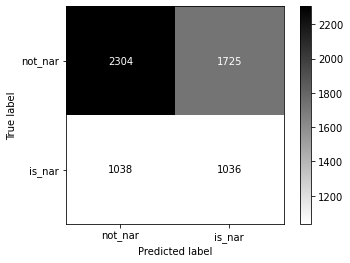

In [283]:
bert_pred = pred_df['bert'].tolist()
labels = list(crf.classes_)
bert_pred_str = ['not_nar' if i ==0 else 'is_nar' for i in bert_pred]
feature_utils.get_prediction_report(flatten(y_test),bert_pred_str,labels,"BERT alone")